Esse trabalho é uma parte do Desafio Final do BootCamp de Pyhton do IGTI.
Nesse projeto final, foi pedido para criar diferentes modelos para realizar a previsão da Diabetes, com base na base de dados de paciente com e sem Diabetes.
Após, rodar os três modelos(KNN, árvore de Decisão e MLP) irei avaliar o que teve a melhor resposta.
Como próxima etapa desse projeto, irei criar uma aplicação em flask para realizar o Deploy do modelo que apresentar a melhor resposta nesse notebook.

In [1]:
#Carregando as bibliotecas iniciais e a base de dados
import pandas as pd
import matplotlib.pyplot as plt

df_diabetes=pd.read_csv('Base-diabetes.csv')


In [2]:
#Visualizando os primeiros elementos dessa base de dados
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# Colocando o nome das colunas do Dados
df_diabetes.columns=['Num. Gravid','Conc. Glicose','Pressao Diast.','Dobra Cut.','Insulina','IMC','Historic','Idade','Result']
###Result ---> 0 Não e  1 Sim
print(df_diabetes.head())

   Num. Gravid  Conc. Glicose  Pressao Diast.  ...  Historic  Idade  Result
0            1             85              66  ...     0.351     31       0
1            8            183              64  ...     0.672     32       1
2            1             89              66  ...     0.167     21       0
3            0            137              40  ...     2.288     33       1
4            5            116              74  ...     0.201     30       0

[5 rows x 9 columns]


Agora irei começar a fazer uma análise das informações contidas nessa base de dados, primeiramente irei verificar:
-1: Os tipos de dados;
-2: Verificar a existencia de zeros e NaN
-3: Avaliar possiveis insconsistencias no Dataset

In [4]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
###### Verificando os tipos de dados no Dataset ##########
##########################################################
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     767 non-null    int64  
 1   Conc. Glicose   767 non-null    int64  
 2   Pressao Diast.  767 non-null    int64  
 3   Dobra Cut.      767 non-null    int64  
 4   Insulina        767 non-null    int64  
 5   IMC             767 non-null    float64
 6   Historic        767 non-null    float64
 7   Idade           767 non-null    int64  
 8   Result          767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
##### Verificando a existencia de Zeros e NaN  ##########
##########################################################
df_diabetes.isnull().sum()

Num. Gravid       0
Conc. Glicose     0
Pressao Diast.    0
Dobra Cut.        0
Insulina          0
IMC               0
Historic          0
Idade             0
Result            0
dtype: int64

In [6]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
###### Verificando Inconsistencias no Dataset   ##########
##########################################################
print(df_diabetes.describe())

       Num. Gravid  Conc. Glicose  ...       Idade      Result
count   767.000000     767.000000  ...  767.000000  767.000000
mean      3.842243     120.859192  ...   33.219035    0.348110
std       3.370877      31.978468  ...   11.752296    0.476682
min       0.000000       0.000000  ...   21.000000    0.000000
25%       1.000000      99.000000  ...   24.000000    0.000000
50%       3.000000     117.000000  ...   29.000000    0.000000
75%       6.000000     140.000000  ...   41.000000    1.000000
max      17.000000     199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


Analisnando as informações estatisticas do nosso data set, podemos inferir que não temos uma inconsistencia de dados, pois esses valores são possiveis de ocorrer.

In [7]:
##########################################################
########## Analise Correspondencia do modelo #############
##########################################################

df_diabetes.corr()

,Num. Gravid,Conc. Glicose,Pressao Diast.,Dobra Cut.,Insulina,IMC,Historic,Idade,Result
Num. Gravid,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Conc. Glicose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
Pressao Diast.,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
Dobra Cut.,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulina,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
IMC,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
Historic,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Idade,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Result,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


Analisnando preliminarmente a matriz de correspondencia do modelo podemos inferir que a priori a "Pressão Diast." e a "Dobra Cut." não possuem um correlação muito grande com o paciente ter ou não diabetes

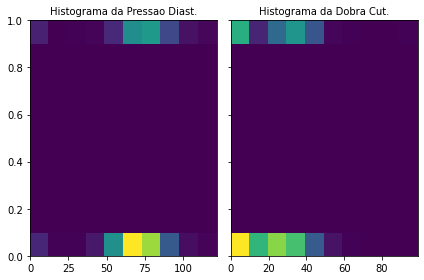

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist2d(df_diabetes['Pressao Diast.'],df_diabetes['Result']);
axs[0].set_title('Histograma da Pressao Diast.', fontsize=10)

axs[1].hist2d(df_diabetes['Dobra Cut.'],df_diabetes['Result']);
axs[1].set_title('Histograma da Dobra Cut.', fontsize=10);

Como já era de se esperar, visto pela matriz de correlação, não podemos tirar uma conclusão sobre a doença olhando somente para a Pressao Diast. e nem para a Dobra Cut.

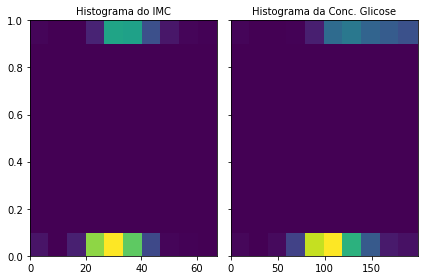

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist2d(df_diabetes['IMC'],df_diabetes['Result']);
axs[0].set_title('Histograma do IMC', fontsize=10)

axs[1].hist2d(df_diabetes['Conc. Glicose'],df_diabetes['Result']);
axs[1].set_title('Histograma da Conc. Glicose', fontsize=10);




Como vitso na matriz de correlação e no histogramas acima, temos variaveis que são mais impactantes para a classificação do paciente do que as outras.
Para melhorar essa visualização e facilitar a sua interpretação, iremos separar esse Dataset em dois dataset diferentes, sendo um apenas com pacientes que são doentes e os outros não 

In [10]:
##########################################################
##### Criando um base só com Pessoas Diabeticas  #########
##########################################################

df_diabetes_com=df_diabetes.loc[df_diabetes['Result']==1]

##########################################################
##### Criando um base só com Pessoas Sem Diabeticas  #####
##########################################################

df_diabetes_sem=df_diabetes.loc[df_diabetes['Result']==0]


Agora iremos analisar se nosso dataset esta balanceado, com isso ja podemos ter uma noção de qual métrica de avaliação iremos utilizar para avaliar nosso modelo.

In [11]:
df_diabetes_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 765
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     267 non-null    int64  
 1   Conc. Glicose   267 non-null    int64  
 2   Pressao Diast.  267 non-null    int64  
 3   Dobra Cut.      267 non-null    int64  
 4   Insulina        267 non-null    int64  
 5   IMC             267 non-null    float64
 6   Historic        267 non-null    float64
 7   Idade           267 non-null    int64  
 8   Result          267 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB


In [12]:
df_diabetes_sem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     500 non-null    int64  
 1   Conc. Glicose   500 non-null    int64  
 2   Pressao Diast.  500 non-null    int64  
 3   Dobra Cut.      500 non-null    int64  
 4   Insulina        500 non-null    int64  
 5   IMC             500 non-null    float64
 6   Historic        500 non-null    float64
 7   Idade           500 non-null    int64  
 8   Result          500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


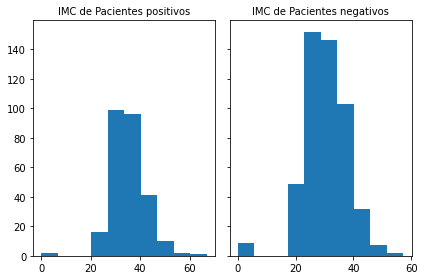

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['IMC'])
axs[0].set_title('IMC de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['IMC'])
axs[1].set_title('IMC de Pacientes negativos', fontsize=10);

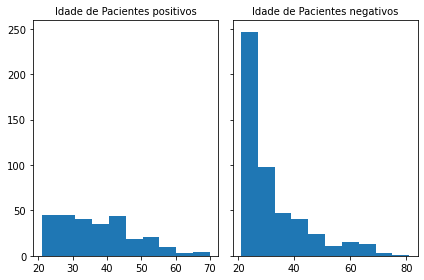

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['Idade'])
axs[0].set_title('Idade de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['Idade'])
axs[1].set_title('Idade de Pacientes negativos', fontsize=10);

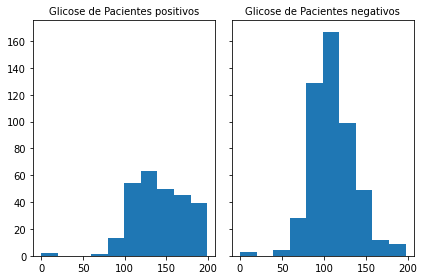

In [15]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['Conc. Glicose'])
axs[0].set_title('Glicose de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['Conc. Glicose'])
axs[1].set_title('Glicose de Pacientes negativos', fontsize=10);


Nessa parte do código iremos rodar três diferentes modelos de classificação (KNN, Random Forest, e MLP), não irei fazer nenhum tipo de filtro nos dados ou balanceamento na base, mesmo sabendo que precisamos uma vez que temos mais casos de paciente com diabetes do que sem.

A primeira etapa vai ser a divisão em dados de entrada e dados target, seguido da normalização dos dados de entrada, que são as caracteristicas avaliadas para fazer a classificação.
Por fim iremos fazer a divisão dos dados de treino e teste. Vale alterar diferentes valores do random_state utilizados para evitar análises tendenciosas

In [16]:
#carregando as bibliotecas necessárias para dividir os dados e normalizar os mesmos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
normaliza = MinMaxScaler() #objeto para a normalização

In [18]:
#transforma os dados em array
entradas= df_diabetes.iloc[:, :-1].values  #dados de entrada
saida= df_diabetes.iloc[:, 8].values  # saídas ou target

In [19]:
entradas_normalizadas=normaliza.fit_transform(entradas)

In [20]:
X_train, X_test, y_train, y_test =train_test_split(entradas_normalizadas, saida, test_size=0.30,random_state=42)

Agora iremos começar a aplicação do modelo de KNN, utilizando 5 vizinhos para fazer a classificação

In [21]:
#aplicando o método do KNN
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)#utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

Agora iremos exibir a matriz de confusão e o report de classificação desse modelo. Como nosso modelo esta desbalanceado iremos avaliar sua eficiencia pela acurácia e pelo F1-score

In [23]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[127  24]
 [ 44  36]]


In [24]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       151
           1       0.60      0.45      0.51        80

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.71      0.69       231



In [25]:
#Avaliando agora por meio de uma arvore de Decisão
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

In [26]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

In [27]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[117  34]
 [ 31  49]]


In [28]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [29]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier
#Algoritmo Rede MLP
clf_mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1,max_iter=1000)
#Realiza o treinamento do classificador
clf_mlp= clf_mlp.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_mlp.predict(X_test)

In [30]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[129  22]
 [ 33  47]]


In [31]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       151
           1       0.68      0.59      0.63        80

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



# Analisando a base de dados, podemos ver que temos muito mais individuos de um tipo do que do outro, por isso, irei fazer o rebalanceamento dos dados

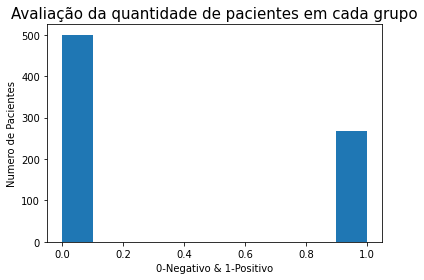

In [32]:
plt.hist(df_diabetes['Result']);
plt.title('Avaliação da quantidade de pacientes em cada grupo', fontsize=15);
plt.xlabel('0-Negativo & 1-Positivo');
plt.ylabel("Numero de Pacientes");

In [33]:
#!pip install imbalanced-learn

In [34]:
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
#!pip install seaborn

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    187
0    187
dtype: int64


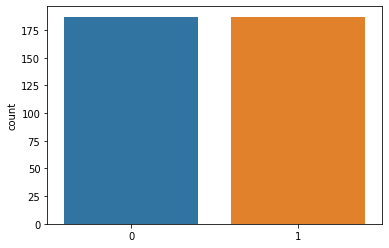

In [36]:
import seaborn as sns
# usar técnica under-sampling
rus = RandomUnderSampler();
X_res, y_res = rus.fit_sample(X_train, y_train);
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts());
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Aplicando novamente o método de MLP para avaliar se houve melhora:

In [37]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier
#Algoritmo Rede MLP
clf_mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1,max_iter=1000)
#Realiza o treinamento do classificador
clf_mlp= clf_mlp.fit(X_res,y_res)

#Realiza a previsão de classificaçao 
y_pred = clf_mlp.predict(X_test)

In [38]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[111  40]
 [ 22  58]]


In [39]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       151
           1       0.59      0.72      0.65        80

    accuracy                           0.73       231
   macro avg       0.71      0.73      0.72       231
weighted avg       0.75      0.73      0.74       231



Como podemos observar, houve uma redução na acurácia do modelo, assim como no F1 score.

Agora irei aplicar a técnica do oversampling, que busca aumentar a quantidade de dados do grupo que inicialmente tinha a menor quantidade

In [40]:
from imblearn.over_sampling import RandomOverSampler

1    349
0    349
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


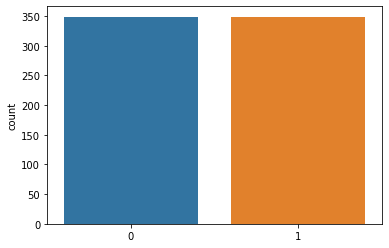

In [41]:
# usar técnica over-sampling
rus = RandomOverSampler();
X_res, y_res = rus.fit_sample(X_train, y_train);
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts());
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Aplicando novamente o método de MLP para avaliar se houve melhora:

In [42]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier
#Algoritmo Rede MLP
clf_mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1,max_iter=1000)
#Realiza o treinamento do classificador
clf_mlp= clf_mlp.fit(X_res,y_res)

#Realiza a previsão de classificaçao 
y_pred = clf_mlp.predict(X_test)

In [43]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[98 53]
 [12 68]]


In [44]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75       151
           1       0.56      0.85      0.68        80

    accuracy                           0.72       231
   macro avg       0.73      0.75      0.71       231
weighted avg       0.78      0.72      0.73       231



O resultado depois dessa técnica apresentou uma pequena melhorias no modelo, então vou continuar utilizando o modelo com a base desbalanceada mesmo. E buscando novas formas de melhorar o modelo.